El proceso que vamos a realizar es el siguiente:

1.Leer la imagen de entrada.

2.Transformar de BGR a HSV y determinar los rangos en donde se encuentren los colores a detectar

3.Encontrar y dibujar cada contorno encontrado por cada color

4.Enumerar cada uno de los círculos de acuerdo al color que poseen

5.Elaborar una imagen resumen

Empezamos importando opencv y numpy con un alias np, luego leemos la imagen con la que vamos a trabajar, esta lleva el nombre de lunares con su extensión png. La imagen presenta círculos de colores amarrillo, violeta, verde y rojo, que son los que contaremos para cada color. 

In [57]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
imagen = cv.imread('/content/drive/MyDrive/GoogleColab/lunares.png')


# **Transformar de BGR a HSV y determinar los límites en donde se encuentren los colores a detectar**

Transformamos la imagen de BGR que es por defecto como lee OpenCV a las imágenes, a HSV con la función cv2.cvtColor:

In [58]:
imagenHSV = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)

# **Determinar los límites en donde se encuentren los colores a detectar**

Necesitamos determinar los límites alto y bajo en donde esté presente cada uno de los colores que deseamos detectar, para ello construiremos un vector con la ayuda de numpy, y para poder encontrar los colores usaremos cv2.inRange. Veamos este proceso para cada color.

Recuerda que puedes visitar el post Detección de colores en OpenCV – Python (En 4 pasos) y DETECCIÓN DE COLORES Y Tracking en OpenCV – Parte2 si quieres los pasos más detallados de como detectar distintos colores.

# **Detectando el color amarillo**
Lo primero que vamos a hacer es determinar los límites altos y bajos en donde se encuentra este color en HSV. Luego usaremos cv2.inRange (como hemos hecho anteriormente).

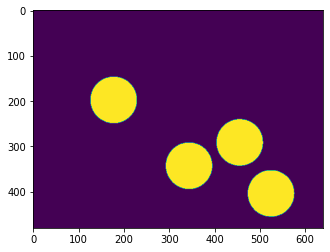

In [59]:
amarilloBajo = np.array([20, 100, 20], np.uint8)
amarilloAlto = np.array([32, 255, 255], np.uint8)
maskAmarillo = cv.inRange(imagenHSV, amarilloBajo, amarilloAlto)

plt.imshow(maskAmarillo)
plt.show()

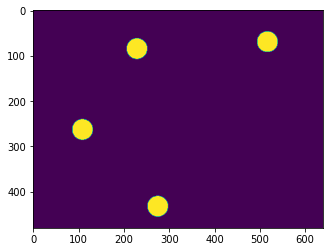

In [60]:
violetaBajo = np.array([130, 100, 20], np.uint8)
violetaAlto = np.array([145, 255, 255], np.uint8)
maskVioleta = cv.inRange(imagenHSV, violetaBajo, violetaAlto)
plt.imshow(maskVioleta)
plt.show()

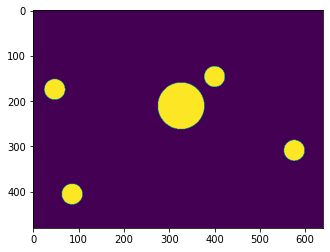

In [61]:
verdeBajo = np.array([36, 100, 20], np.uint8)
verdeAlto = np.array([70, 255, 255], np.uint8)
maskVerde = cv.inRange(imagenHSV, verdeBajo, verdeAlto)
plt.imshow(maskVerde)
plt.show()

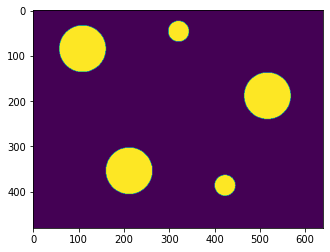

In [62]:
rojoBajo1 = np.array([0, 100, 20], np.uint8)
rojoAlto1 = np.array([10, 255, 255], np.uint8)
rojoBajo2 = np.array([175, 100, 20], np.uint8)
rojoAlto2 = np.array([180, 255, 255], np.uint8)
maskRojo1 = cv.inRange(imagenHSV, rojoBajo1, rojoAlto1)
maskRojo2 = cv.inRange(imagenHSV, rojoBajo2, rojoAlto2)
maskRojo =  cv.add(maskRojo1, maskRojo2)

plt.imshow(maskRojo)
plt.show()

# **Encontrar y dibujar cada contorno encontrado por cada color**
Ahora que tenemos las imágenes binarias del amarillo, violeta, verde y rojo, podemos encontrar cada uno de sus contornos con 

cv2.findContours.

**NOTA:** Utiliza el código  para encontrar los contornos que se muestra a continuación de acuerdo a tu versión de OpenCV.

In [63]:
#Encontrando contornos
#OpenCV 3
#contornosAmarillo = cv.findContours(maskAmarillo, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[1]
#contornosVioleta = cv.findContours(maskVioleta, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[1]
#contornosVerde = cv.findContours(maskVerde, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[1]
#contornosRojo = cv.findContours(maskRojo, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[1]
#OpenCV 4
contornosAmarillo = cv.findContours(maskAmarillo, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
contornosVioleta = cv.findContours(maskVioleta, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
contornosVerde = cv.findContours(maskVerde, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
contornosRojo = cv.findContours(maskRojo, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

# **Enumerar cada uno de los círculos de acuerdo al color**
Vamos a enumerar cada círculo por su color, además que rodearemos a este, por ello vamos a crear una pequeña función:

In [64]:
def dibujarContorno(contornos, color):
    for (i, c) in enumerate(contornos):
        M = cv.moments(c)
        if (M["m00"]==0): M["m00"]==1
        x = int(M["m10"]/M["m00"])
        y = int(M["m01"]/M["m00"])
        cv.drawContours(imagen, [c], 0, color, 2)
        cv.putText(imagen, str(i+1), (x-10,y+10), 1, 2,(0,0,0),2)

La función dibujarContorno necesita de contornos (encontrados por cada color) y un color en BGR para que sean rodeados dichos contornos. Luego vamos a tratar cada contorno encontrado dentro de contornos, por lo que estamos usando un for. Para poder enumerar cada círculo, es decir para poner un número dentro del círculo nos ayudaremos de cv2.moments, con este vamos a encontrar los puntos centrales x e y del contorno. Finalmente dibujamos los contornos con cv2.drawContours del color dado a la función, y añadimos el texto con cv2.putText que se visualizará en color negro.

Para una explicación más extensa de como trabajar con contornos y como dibujarlos haz clic aquí. Mientras que si necesitas información de como funciona cv2.putText, da clic aquí.

Usaremos esta función creada para cada color, veamos:

# **Enumerando el color amarillo**

In [69]:
dibujarContorno(contornosAmarillo, (0, 255,255))
